<a href="https://colab.research.google.com/github/udlbook/iclimbtrees/blob/main/notebooks/ShallowNN/NeuralNetworkExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural network example**

The purpose of this notebook is recreate the shallow neural network from equation 1.0.1 and figure 3.3 with shallow neural networks with 1D inputs.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and write code to complete the functions.

You can save a local copy of this notebook in your Google account and work through it in Colab (recommended) or you can download the notebook and run it locally using Jupyter notebook or similar. If you are using CoLab, we recommend that turn off AI autocomplete (under cog icon in top-right corner), which will give you the answers and defeat the purpose of the exercise.

A fully working version of this notebook with the complete answers can be found [here](https://colab.research.google.com/github/udlbook/iclimbtrees/blob/main/notebooks/ShallowNN/NeuralNetworkExample_Answers.ipynb).

Contact me at iclimbtreesmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

Let's first construct the shallow neural network with one input, three hidden units, and one output described in section 1 of the unit.

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(h_in):
  # TODO write code to implement the ReLU and compute the output of the hidden unit
  # This should work on every element of the ndarray "h_input" at once
  # One way to do this is with the ndarray "clip" function
  # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.clip.html
  # REPLACE THIS LINE
  h_out = np.zeros_like(h_in);

  return h_out

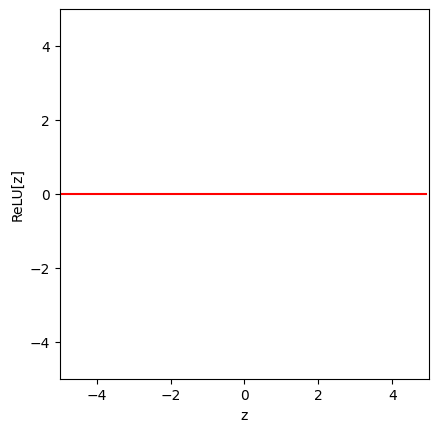

In [3]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

In [4]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO Replace the lines below to compute the three initial inputs to the hidden unit
  # (lines figure 3.3 top row) from the theta parameters.
  h_in_1 = np.zeros_like(x)
  h_in_2 = np.zeros_like(x)
  h_in_3 = np.zeros_like(x)

  # Pass these through the ReLU function to compute the hidden unit outputs as in
  # figure 3.3 (second row)
  h_out_1 = activation_fn(h_in_1)
  h_out_2 = activation_fn(h_in_2)
  h_out_3 = activation_fn(h_in_3)
  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure 3.3 (third row)
  phi_h_out_1 = np.zeros_like(x)
  phi_h_out_2 = np.zeros_like(x)
  phi_h_out_3 = np.zeros_like(x)

  # TODO Replace the code below to combing the weighted hidden unit outputs and add
  # phi_0 to create the output as in figure 3.3 (bottom right)
  y = np.zeros_like(x)

  # Return everything we have calculated
  return y, h_in_1, h_in_2, h_in_3, \
            h_out_1, h_out_2, h_out_3, \
            phi_h_out_1, phi_h_out_2, phi_h_out_3

In [5]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y,  h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, \
                  phi_h_out_1, phi_h_out_2, phi_h_out_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,h_in_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,h_in_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,h_in_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,h_out_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,h_out_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,h_out_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,phi_h_out_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,phi_h_out_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,phi_h_out_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

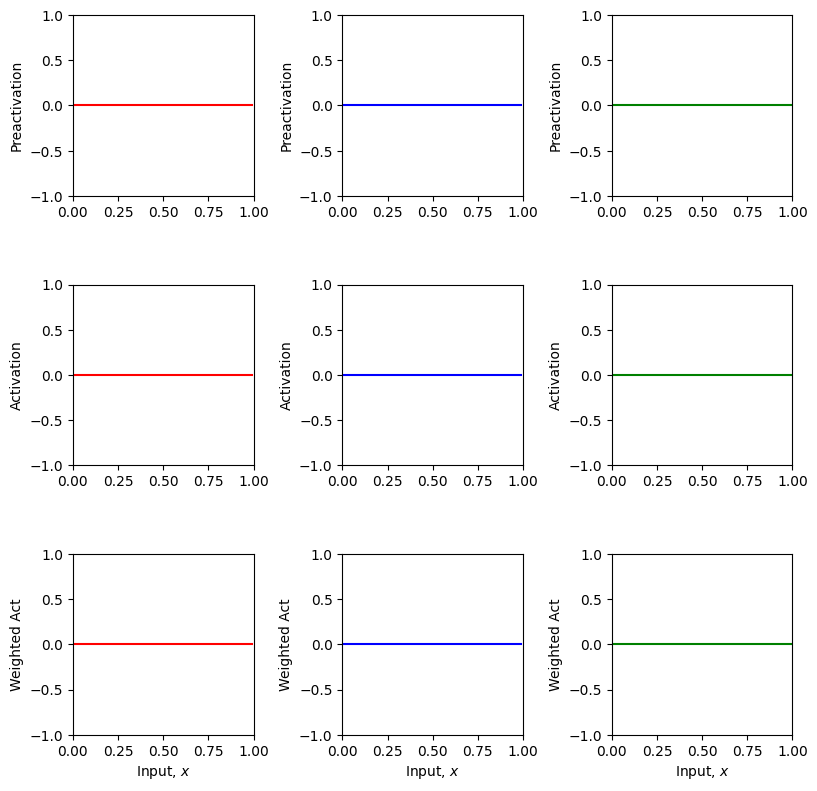

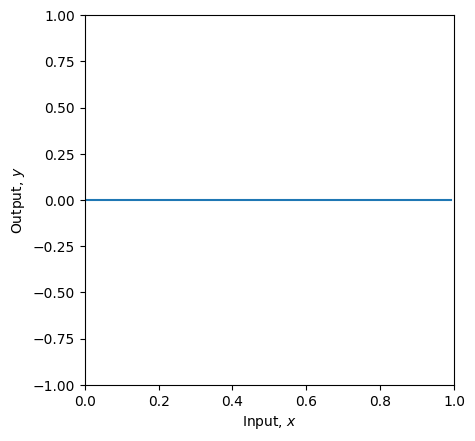

In [6]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y,  h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, phi_h_out_1, phi_h_out_2, phi_h_out_3,= \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, \
                  phi_h_out_1, phi_h_out_2, phi_h_out_3, plot_all=True)

If your code is correct, then the final output should look like this:


Now let's play with the parameters to make sure we understand how they work.  The original  parameters were:

$\theta_{10} =  0.3$ ; $\theta_{11} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

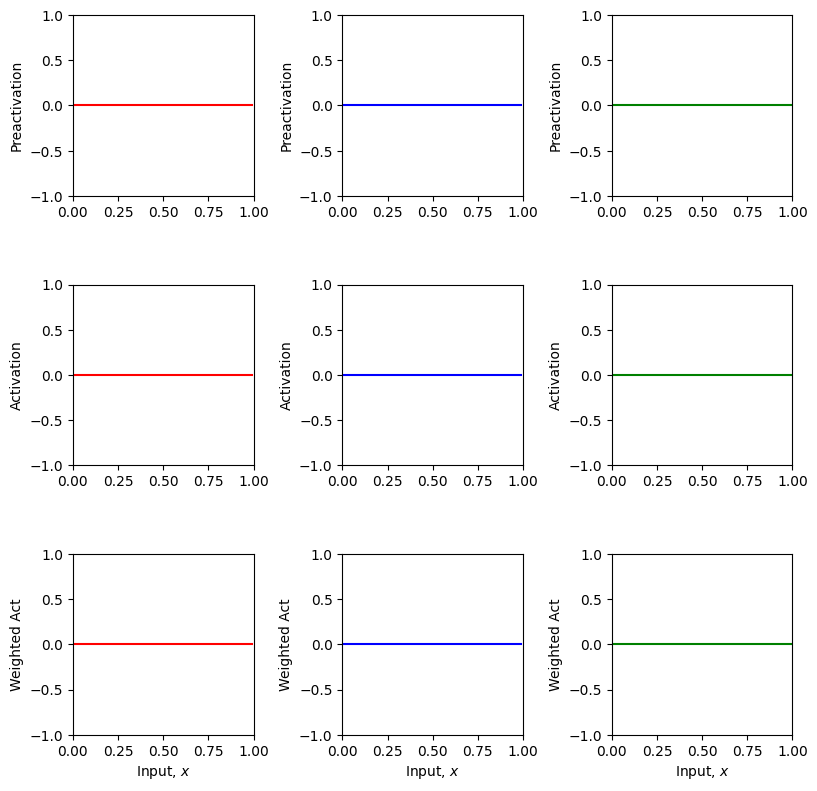

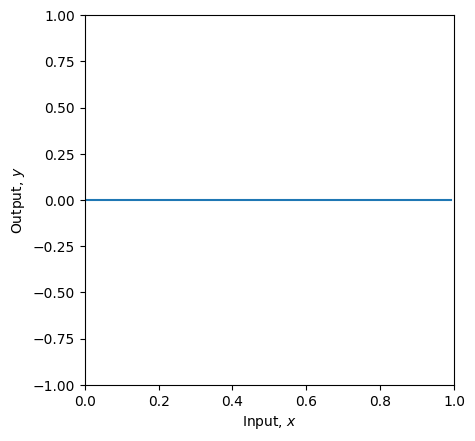

In [7]:
# TODO
# 1. Predict what effect changing phi_0 will have on the network. Use the code below to check if you are correct.

# 2. Predict what effect multiplying phi_1, phi_2, phi_3 by 0.5 would have.  Use the code below to check if you are correct.

# 3. Predict what effect multiplying phi_1 by -1 will have.  Check if you are correct.

# 4. Predict what effect setting theta_20 to -1.2 will have.  Check if you are correct.

# 5. Change the parameters so that there are only two "joints" (including outside the range of the plot)
# There are actually three ways to do this. See if you can figure them all out

# 6. With the original parameters, the second line segment is flat (i.e. has slope zero)
# How could you change theta_10 so that all of the segments have non-zero slopes

# 7. What do you predict would happen if you multiply theta_20 and theta21 by 0.5, and phi_2 by 2.0?
# Check if you are correct.

# 8. What do you predict would happen if you multiply theta_20 and theta21 by -0.5, and phi_2 by -2.0?
# Check if you are correct.

theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y,  h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, phi_h_out_1, phi_h_out_2, phi_h_out_3,= \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, \
                  phi_h_out_1, phi_h_out_2, phi_h_out_3, plot_all=True)

# Least squares loss

Now let's consider fitting the network to data.  First we need to define the loss function.  We'll use the least squares loss:

\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}\Bigl(y_{i}-\text{f}[x_{i},\boldsymbol\phi]\Bigr)^2
\end{equation}

where $(x_i,y_i)$ is an input/output training pair and $\text{f}[\bullet,\boldsymbol\phi]$ is the neural network with parameters $\boldsymbol\phi$.  The first term in the brackets is the ground truth output and the second term is the prediction of the model

In [8]:
# Least squares function
def least_squares_loss(y_train, y_predict):
  # TODO Replace the line below to compute the sum of squared
  # differences between the real values of y and the predicted values from the model f[x_i,phi]
  # You may need to use the function np.sum
  loss = 0

  return loss

In [9]:
# Draw the neural network and calculate the least squares loss
def plot_and_calc_loss(ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, \
                       theta_20, theta_21, theta_30, theta_31, x_train, y_train):

  # Define a range of input values to draw functions
  x_plot = np.arange(0,1,0.01)

  # We run the neural network for each of these input values
  y,  h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, phi_h_out_1, phi_h_out_2, phi_h_out_3,= \
      shallow_1_1_3(x_plot, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

  # And then plot it along with the data
  plot_neural(x_plot, y, h_in_1, h_in_2, h_in_3, h_out_1, h_out_2, h_out_3, \
                    phi_h_out_1, phi_h_out_2, phi_h_out_3, plot_all=True, x_data = x_train, y_data = y_train)

  # Run the neural network on the training data
  y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

  # Compute the least squares loss and print it out
  loss = least_squares_loss(y_train,y_predict)
  print('Your Loss = %3.3f'%(loss))

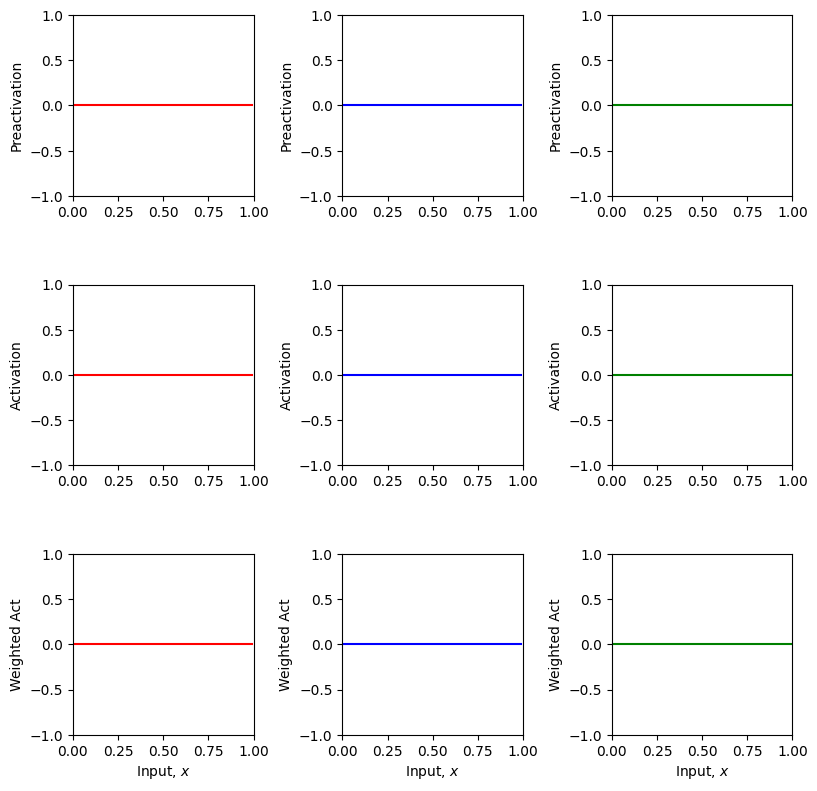

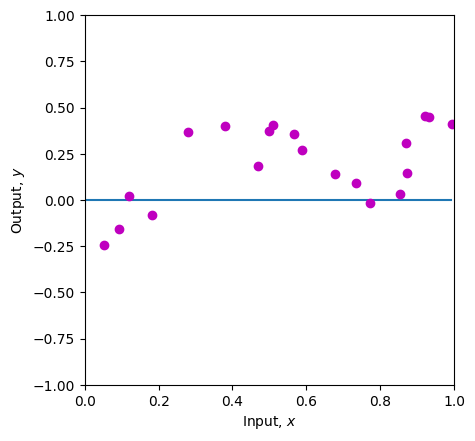

Your Loss = 0.000


In [10]:
# Define training data pairs
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                  0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                  0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                  0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# Now lets define some parameters, run the neural network, and compute the loss
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

plot_and_calc_loss(ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, \
                       theta_20, theta_21, theta_30, theta_31, x_train, y_train)

# TODO.  Manipulate the parameters (by hand!) to make the function
# fit the data better and try to reduce the loss to as small a number
# as possible.  The best that I could do was 0.181
# Tip... start by manipulating phi_0.
# It's not that easy, so don't spend too much time on this!
